In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.append("../../")
import yellowbrick

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.style import find_text_color
from yellowbrick.style.palettes import color_sequence

colors = ['Blues','Greens','Oranges','Purples','Reds']
cmaps = []
for c in colors:
    cmaps.append(color_sequence(c))
    

In [4]:
def show_example(coef_choice):
    X = np.linspace(0,1,num=21)
    Y = np.linspace(0,1,num=2)
    values = np.array([np.linspace(0,1,num=20)])
    fig, axarr = plt.subplots(len(cmaps),1,squeeze=False)

    for idx, cmap in enumerate(cmaps):
        ax = axarr[idx,0]
        ax.pcolormesh(X,Y,values,cmap=cmap)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for idx, x in enumerate(X):
            if x < 1:
                text_x = x + 0.025
                text_y = 0.5
                base_value = round(values[0][idx],1)
                base_color = cmap(base_value)
                color=find_text_color(base_color,coef_choice=coef_choice)
                ax.text(text_x,text_y,base_value,va='center',ha='center',fontsize=12,color=color)
    plt.show()

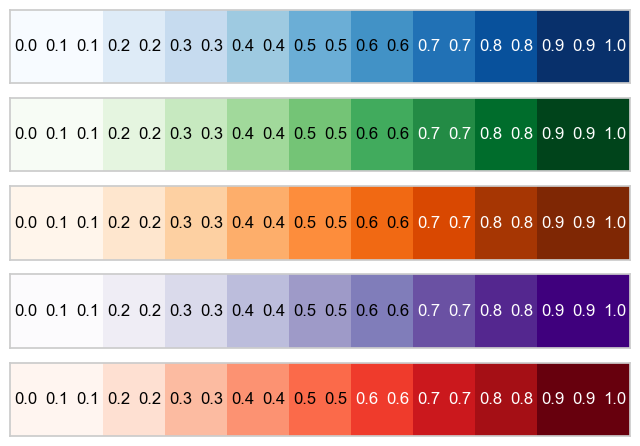

In [5]:
show_example(0)

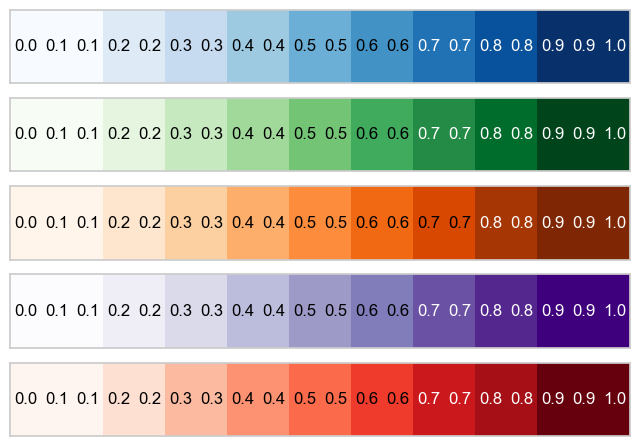

In [6]:
show_example(1)

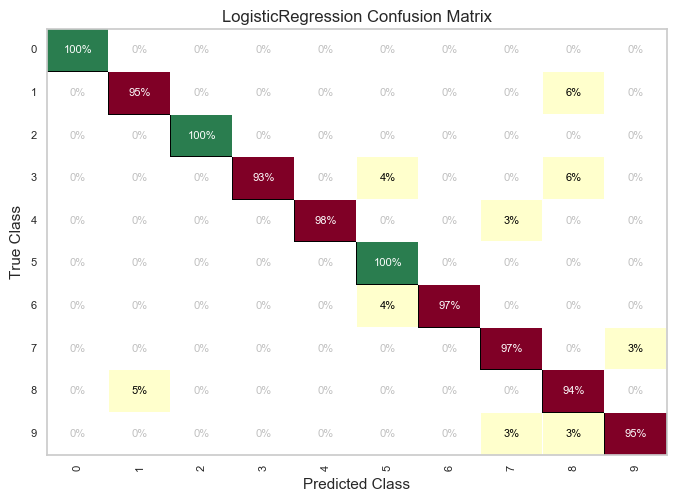

In [8]:
#See it in action with the ConfusionMatrix


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=11)
model = LogisticRegression()
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()